In [49]:
# Imports
import keras
from firebase.firebase import FirebaseApplication
from keras.models import load_model
import h5py
from matplotlib import pyplot as plt
import numpy as np
import simplejson as json


cancer = FirebaseApplication('https://chemo-ae40b.firebaseio.com/bp/6mlAIiwk3miukpl3O9Zf/', None)


In [50]:
print("Loading Dataset...")
# Load HDF5 dataset
h5f = h5py.File('./data/train.h5', 'r')
X_train = h5f['X']
Y_train = h5f['Y']
print("Dataset loaded!\n\n")

Loading Dataset...
Dataset loaded!




In [51]:
print("Loading validation...")
# Loads validation data
h5f2 = h5py.File('./data/val.h5', 'r')
X_test = h5f2['X']
Y_test = h5f2['Y']
print("Validation Loaded!\n\n")

Loading validation...
Validation Loaded!




In [52]:
# load model
model = load_model('./models/model_saves/Final_Model.model')
# summarize model.
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)      

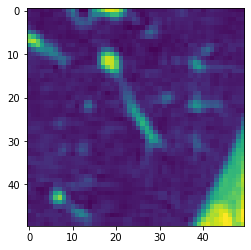

In [100]:
test_image = X_test[1]
test_label = Y_test[1]
plt.imshow(test_image.reshape((50, 50)))

In [101]:
def shape_image(image):
    image = image.reshape((50, 50, 1))
    image = np.expand_dims(image, axis=0)
    return image

In [102]:
test_image = shape_image(test_image)
test_image.shape

(1, 50, 50, 1)

In [103]:
model.predict(test_image)

array([[0.9988086 , 0.00119135]], dtype=float32)

In [104]:
print(test_label)
final = json.dumps(test_label.tolist())
data_to_upload = {
    'Cancer' : final
}
result = cancer.put('/testdata/', '-M0lt0AddmnUmnaNaqO_', data_to_upload)
print(result)


[1. 0.]
{'Cancer': '[1.0, 0.0]'}
